In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [6]:
data = pd.read_csv('D:/Data Science/Assignment/12Naive bayes/SalaryData_Train.csv')
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
numerical=[var for var in data.columns if data[var].dtypes!='O']
numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [20]:
#check null values
data[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2bf2424f160>,
 'caps': [<matplotlib.lines.Line2D at 0x2bf2424f820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bf24233dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bf2424fee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bf2425a280>],
 'means': []}

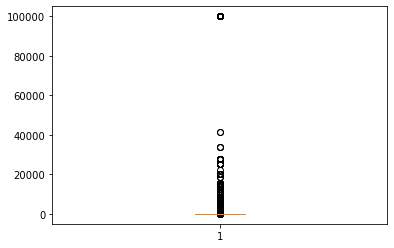

In [21]:
#plot capitalgain colunm data in boxplot
plt.boxplot(data['capitalgain'])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

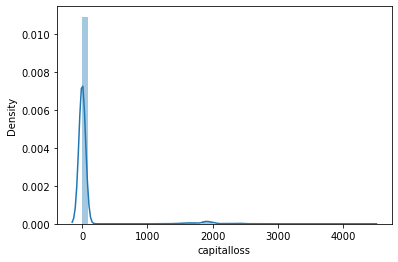

In [22]:
#plot capitalloss colunm 
sns.distplot(data["capitalloss"])

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

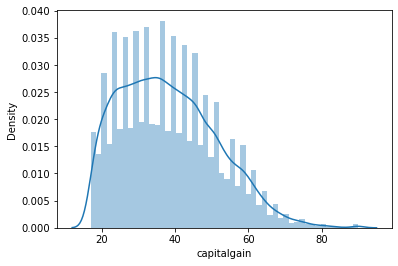

In [24]:
#remove Outlier from capitalgain
data["capitalgain"]=data.loc[data["capitalgain"]<20000]
sns.distplot(data["capitalgain"])

In [25]:
data.shape

(30161, 14)

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

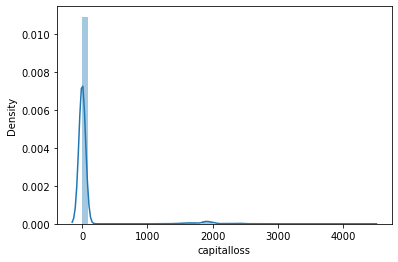

In [28]:
sns.distplot(data["capitalloss"])

(array([  511.,  1877.,  1995., 16581.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

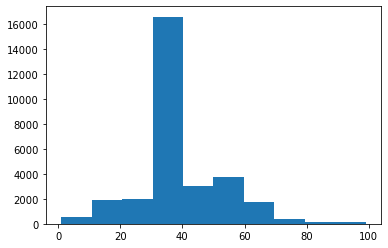

In [29]:
#plot hoursperweek column data in histogram
plt.hist(data["hoursperweek"])

<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

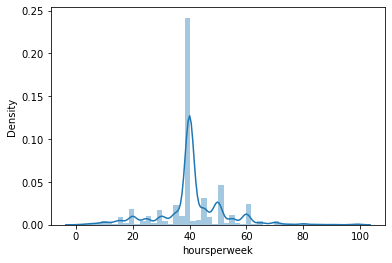

In [30]:
sns.distplot(data["hoursperweek"])

In [31]:
#clean data
clean_data=data.dropna(axis=0)
clean_data.shape

(29929, 14)

In [32]:
data.shape

(30161, 14)

In [33]:
y=clean_data['Salary']

In [34]:
y.shape

(29929,)

In [36]:
train_data=clean_data.iloc[:,0:13]
train_data.shape

(29929, 13)

In [37]:
x= pd.get_dummies(train_data)
x.shape

(29929, 173)

In [40]:
#split data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 7)
x_train.shape,x_test.shape

((22446, 173), (7483, 173))

In [43]:
#apply Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [46]:
#predict test data
y_pred = gnb.predict(x_test)
np.mean(y_pred == y_test)

0.6406521448616865

In [48]:
#predict train data
y_pred_2 = gnb.predict(x_train)
np.mean(y_pred_2 == y_train)

0.6385993049986635

In [50]:
#tree baseb feature selaction
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x,y)

DecisionTreeClassifier()

In [51]:
print(dt_model.feature_importances_.round(2))

[0.09 0.13 0.04 0.11 0.01 0.01 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.   0.   0.01 0.
 0.   0.22 0.   0.   0.   0.   0.01 0.   0.01 0.01 0.   0.   0.01 0.01
 0.   0.01 0.   0.01 0.01 0.01 0.   0.   0.   0.   0.   0.01 0.   0.
 0.01 0.   0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.01 0.   0.  ]


In [53]:
l= dt_model.feature_importances_>0.01
print(np.where(l==True))

(array([ 0,  1,  2,  3,  5,  6,  8, 29, 37, 43, 45], dtype=int64),)


In [55]:
new_x=x.iloc[:,[0, 1, 2, 3, 5, 6, 8, 29, 37, 43 ]]
new_x

,age,educationno,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,maritalstatus_ Married-civ-spouse,occupation_ Exec-managerial,occupation_ Prof-specialty
0,39,13,0,40,0,0,0,0,0,0
1,50,13,0,13,0,0,1,1,1,0
2,38,9,0,40,0,1,0,0,0,0
3,53,7,0,40,0,1,0,1,0,0
4,28,13,0,40,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,38,0,1,0,1,0,0
30157,40,9,0,40,0,1,0,1,0,0
30158,58,9,0,40,0,1,0,0,0,0
30159,22,9,0,20,0,1,0,0,0,0


In [58]:
#split the data in train and test again for GNB
x_new_train , x_new_test,y_new_train,y_new_test=train_test_split(new_x,y,test_size=0.25, random_state=7)
x_new_train.shape,x_new_test.shape

((22446, 10), (7483, 10))

In [59]:
#apply gaussion NB
gnb.fit(x_new_train,y_new_train)

GaussianNB()

In [62]:
#train data accuracy
y_train_pred = gnb.predict(x_new_train)
np.mean(y_train_pred == y_new_train)

0.7951973625590305

In [63]:
#test data accuracy
y_new_pred = gnb.predict(x_new_test)
np.mean(y_new_test == y_new_pred)

0.7923292797006548

In [66]:
#multinomial Naive bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_new_train,y_new_train)

MultinomialNB()

In [68]:

x_train_pred_mnb =mnb.predict(x_new_test)
print(np.mean(y_new_test==x_train_pred_mnb))

0.7511693171188026


In [71]:
y_train_pred_mnb= mnb.predict(x_new_train)
np.mean(y_train_pred_mnb==y_new_train)

0.7606700525706139

base on different features accuracy we can conclude that Feature obtain using Tree Based Feature selection and applying Gaussian Naive Bayes on Extracted Feature data we get model which performs good for Training and Testing data.


## Test Data

In [75]:
test_data = pd.read_csv('D:/Data Science/Assignment/12Naive bayes/SalaryData_Test.csv')
print(test_data.shape)
test_data.head()


(15060, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [77]:
#creat dummy data
dummies_test_data=pd.get_dummies(test_data)
dummies_test_data.shape

(15060, 104)

In [82]:
final_test_data= dummies_test_data[new_x.columns]
final_test_data

,age,educationno,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,maritalstatus_ Married-civ-spouse,occupation_ Exec-managerial,occupation_ Prof-specialty
0,25,7,0,40,0,1,0,0,0,0
1,38,9,0,50,0,1,0,1,0,0
2,28,12,0,40,1,0,0,1,0,0
3,44,10,0,40,0,1,0,1,0,0
4,34,6,0,30,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,40,0,1,0,0,0,1
15056,39,13,0,36,0,1,0,0,0,1
15057,38,13,0,50,0,1,0,1,0,1
15058,44,13,0,40,0,1,0,0,0,0


In [78]:
test_y = test_data["Salary"]


In [84]:
#Testing test data on gaussian naive bayes
test_data_pred = gnb.predict(final_test_data)
np.mean(test_data_pred == test_y)

0.7952191235059761

In [85]:
#multinomial naive bayes
test_data_pred_mnb = mnb.predict(final_test_data)
np.mean(test_data_pred_mnb==test_y)

0.7549136786188579

now we can conclude that model created using Gaussian Naive Bayes and exctracted Features using Tree Based featureselection method gives us good Training and Testing accuracy.